In [27]:
!pip install pykrx

In [28]:
import datetime
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

In [29]:
now = datetime.datetime.now()
today = now.strftime("%Y%m%d")
today

'20251107'

In [30]:
df = stock.get_market_ohlcv_by_date("20151001", today, "229200")
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918
2015-10-05,10219,10229,10175,10196,43301,0.820726
2015-10-06,10212,10238,10137,10141,42543,-0.539427
2015-10-07,10059,10059,9913,9915,21396,-2.228577
...,...,...,...,...,...,...
2025-11-03,15515,15730,15370,15730,9858888,2.375529
2025-11-04,15810,16275,15755,16110,20238772,2.415766
2025-11-05,16040,16040,15110,15635,19008316,-2.948479


In [31]:
df.to_excel("../Finance_data/229200.xlsx")

In [32]:
df = pd.read_excel("../Finance_data/229200.xlsx", index_col="날짜")
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918
2015-10-05,10219,10229,10175,10196,43301,0.820726
2015-10-06,10212,10238,10137,10141,42543,-0.539427
2015-10-07,10059,10059,9913,9915,21396,-2.228577
...,...,...,...,...,...,...
2025-11-03,15515,15730,15370,15730,9858888,2.375529
2025-11-04,15810,16275,15755,16110,20238772,2.415766
2025-11-05,16040,16040,15110,15635,19008316,-2.948479


In [33]:
df['변동'] = df['고가'] - df['저가']
df.head()

,시가,고가,저가,종가,거래량,등락률,변동
날짜,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66
2015-10-02,10100,10123,10100,10113,63440,0.466918,23
2015-10-05,10219,10229,10175,10196,43301,0.820726,54
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146


In [34]:
df['전일변동'] = df['변동'].shift(1)
df.head()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동
날짜,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0


In [35]:
df['목표가'] = df['시가'] + df['전일변동'] * 0.5
df.head()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가
날짜,,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0,10133.0
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0,10230.5
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0,10239.0
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0,10109.5


In [36]:
df['수익률'] = np.where(df['고가'] >= df['목표가'], df['종가']/df['목표가'], 1)
df.head()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률
날짜,,,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN,NaN,1.0
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0,10133.0,1.0
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0,10230.5,1.0
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0,10239.0,1.0
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0,10109.5,1.0


In [37]:
df['누적수익률'] = df['수익률'].cumprod()
df.tail()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률,누적수익률
날짜,,,,,,,,,,,
2025-11-03,15515,15730,15370,15730,9858888,2.375529,360,250.0,15640.0,1.005754,2.540162
2025-11-04,15810,16275,15755,16110,20238772,2.415766,520,360.0,15990.0,1.007505,2.559225
2025-11-05,16040,16040,15110,15635,19008316,-2.948479,930,520.0,16300.0,1.000000,2.559225
2025-11-06,15855,15970,15415,15620,12817499,-0.095939,555,930.0,16320.0,1.000000,2.559225
2025-11-07,15370,15530,14970,15140,8579440,-3.072983,560,555.0,15647.5,1.000000,2.559225


In [38]:
delta = df.index[-1] - df.index[0]
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** (1 / year) -1
print("CAGR: ", CAGR * 100)

CAGR:  9.740884230903113


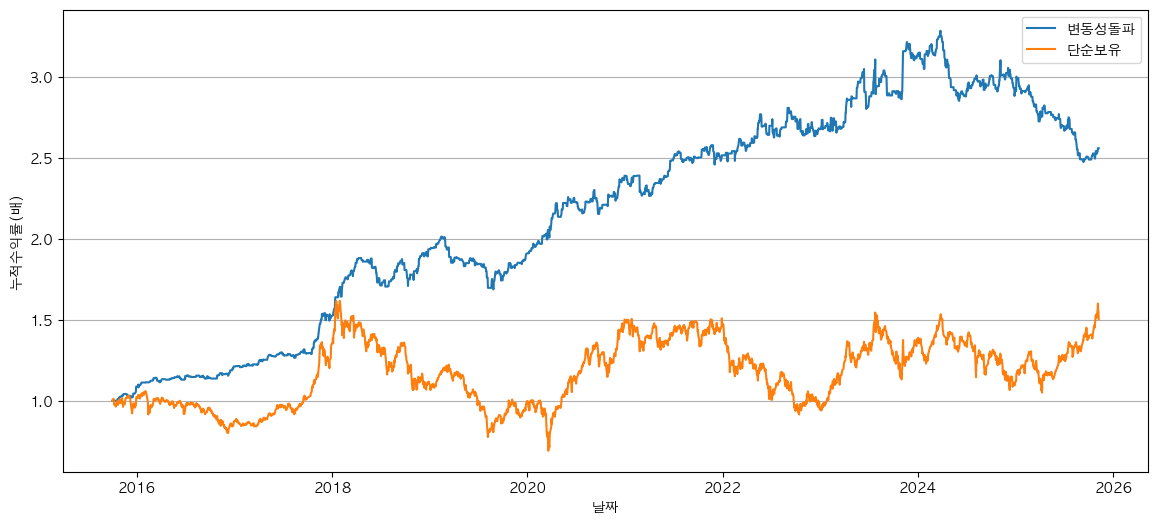

In [39]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['누적수익률'], label="변동성돌파")
ax.plot(df['종가'] / df['종가'].iloc[0], label="단순보유")

plt.xlabel('날짜')
plt.ylabel('누적수익률(배)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [40]:
df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100
df.tail()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률,누적수익률,전고점,DD
날짜,,,,,,,,,,,,,
2025-11-03,15515,15730,15370,15730,9858888,2.375529,360,250.0,15640.0,1.005754,2.540162,3.284618,22.664928
2025-11-04,15810,16275,15755,16110,20238772,2.415766,520,360.0,15990.0,1.007505,2.559225,3.284618,22.084553
2025-11-05,16040,16040,15110,15635,19008316,-2.948479,930,520.0,16300.0,1.000000,2.559225,3.284618,22.084553
2025-11-06,15855,15970,15415,15620,12817499,-0.095939,555,930.0,16320.0,1.000000,2.559225,3.284618,22.084553
2025-11-07,15370,15530,14970,15140,8579440,-3.072983,560,555.0,15647.5,1.000000,2.559225,3.284618,22.084553


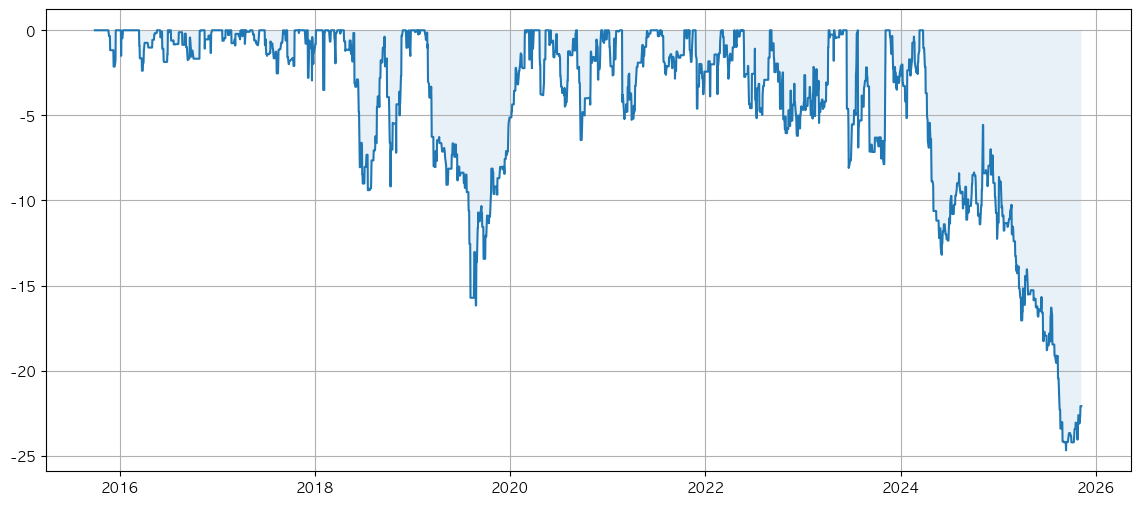

In [41]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['DD'] * -1)
ax.fill_between(df.index, df['DD'] * -1, alpha=0.1)
ax.grid()
plt.show()

In [42]:
df['DD'].max()

np.float64(24.67895914246102)

In [43]:
df['MA10'] = df['종가'].rolling(window=10).mean()
df.head(n=10)

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10
날짜,,,,,,,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN,NaN,1.0,1.0,1.0,0.0,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0,10133.0,1.0,1.0,1.0,0.0,NaN
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0,10230.5,1.0,1.0,1.0,0.0,NaN
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0,10239.0,1.0,1.0,1.0,0.0,NaN
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0,10109.5,1.0,1.0,1.0,0.0,NaN
2015-10-08,9969,9987,9752,9823,42342,-0.927887,235,146.0,10042.0,1.0,1.0,1.0,0.0,NaN
2015-10-12,9818,9818,9790,9798,42351,-0.254505,28,235.0,9935.5,1.0,1.0,1.0,0.0,NaN
2015-10-13,9834,9834,9744,9747,21160,-0.520514,90,28.0,9848.0,1.0,1.0,1.0,0.0,NaN
2015-10-14,9738,9769,9697,9700,23397,-0.482200,72,90.0,9783.0,1.0,1.0,1.0,0.0,NaN


In [44]:
df['매매신호'] = df['시가'] > df['MA10'].shift(1)   # 당일 시가 > 전일 종가까지로 계산된 10일 이동평균

In [45]:
df['수익률2'] = np.where((df['매매신호'] == 1) & (df['고가'] >= df['목표가']), 
                        df['종가'] / df['목표가'], 
                        1)

In [46]:
df['누적수익률2'] = df['수익률2'].cumprod()

In [47]:
df['누적수익률2'].iloc[-1]

np.float64(1.4192454643051429)

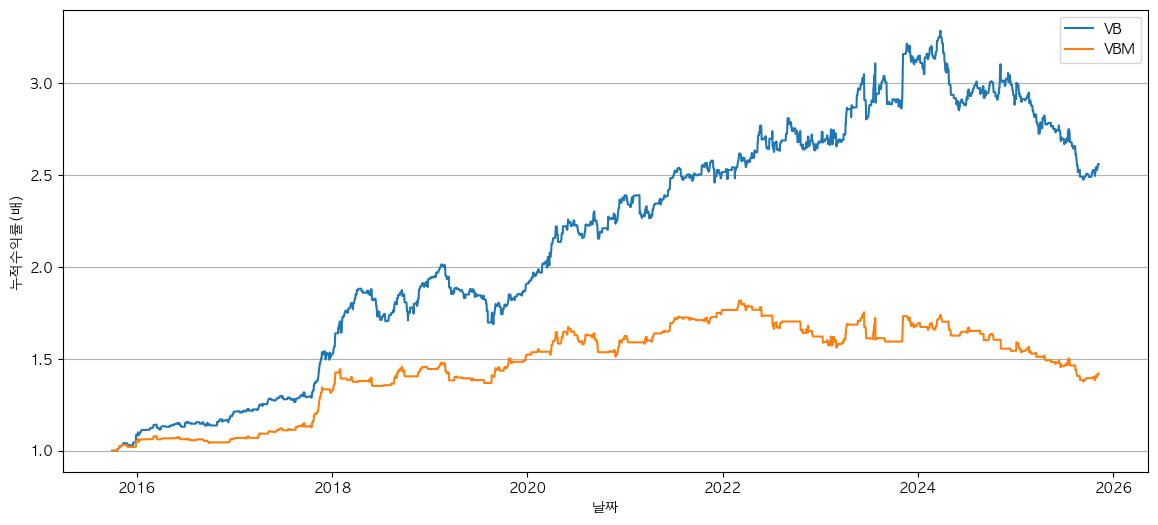

In [48]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['누적수익률'], label="VB")
ax.plot(df['누적수익률2'], label="VBM")

plt.xlabel('날짜')
plt.ylabel('누적수익률(배)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [49]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100

In [50]:
df['DD2'].max()

np.float64(24.24123113373269)

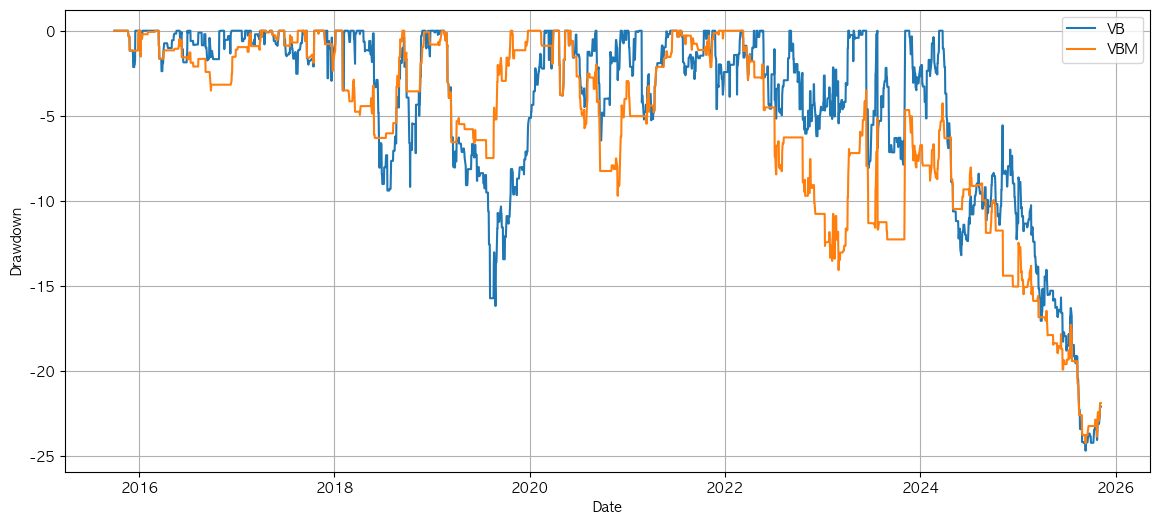

In [51]:
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['DD'] * -1, label='VB')
ax.plot(df.index, df['DD2'] * -1, label='VBM')

ax.grid()
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(loc='best')
plt.show()